In [188]:
import json
import matplotlib 
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [189]:
## define some colors 
COLORS = (
    [
        # personal color
        '#313695',  # DARK BLUE
        '#74add1',  # LIGHT BLUE
        '#f46d43',  # ORANGE
        '#4daf4a',  # GREEN
        '#984ea3',  # PURPLE
        '#f781bf',  # PINK
        '#ffc832',  # YELLOW
        '#000000',  # BLACK
        # deepmind style
        '#0072B2',
        '#009E73',
        '#D55E00',
        '#CC79A7',
        '#d73027',  # RED
        # built-in color
        'blue',
        'red',
        'pink',
        'cyan',
        'magenta',
        'yellow',
        'black',
        'purple',
        'brown',
        'orange',
        'teal',
        'lightblue',
        'lime',
        'lavender',
        'turquoise',
        'darkgreen',
        'tan',
        'salmon',
        'gold',
        'darkred',
        'darkblue',
        'green'
    ]
)

In [190]:
# read rewards for ddqn at different seeds
reward_ddqn_0 = pd.read_csv('ddqn-reward-0.csv', index_col=[0])
reward_ddqn_0.columns = ['reward0']
reward_ddqn_1 = pd.read_csv('ddqn-reward-1.csv', index_col=[0])
reward_ddqn_1.columns = ['reward1']
reward_ddqn_2 = pd.read_csv('ddqn-reward-2.csv', index_col=[0])
reward_ddqn_2.columns = ['reward2']
rewards_ddqn = pd.concat([reward_ddqn_0, reward_ddqn_1, reward_ddqn_2], axis=1)
rewards_ddqn['mean'] = rewards_ddqn.mean(axis=1)
rewards_ddqn['std'] = rewards_ddqn.std(axis=1)
rewards_ddqn.head()

,reward0,reward1,reward2,mean,std
0,-774.214966,-775.481628,-775.481628,-775.059408,0.597110
1,-881.574158,-892.184143,-889.802612,-887.853638,4.545461
2,-793.416626,-793.416626,-783.096558,-789.976603,4.864927
3,-870.306519,-870.306519,-869.186340,-869.933126,0.528057
4,-892.833923,-892.833923,-892.833923,-892.833923,0.000000


In [191]:
reward_ddqn_mb0 = json.load(open('./backup/ddqn-rc-dyna-lssm-reward-0.json', 'r'))
reward_ddqn_mb1 = json.load(open('./backup/ddqn-rc-dyna-lssm-reward-1.json', 'r'))
reward_ddqn_mb2 = json.load(open('./backup/ddqn-rc-dyna-lssm-reward-2.json', 'r'))

d = {'0': reward_ddqn_mb0, '1': reward_ddqn_mb1, '2': reward_ddqn_mb2}
rewards_ddqn_mb = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in d.items() ]))
rewards_ddqn_mb['mean'] = rewards_ddqn_mb.mean(axis=1)
rewards_ddqn_mb['std'] = rewards_ddqn_mb.std(axis=1)


In [192]:
# read rewards for ddqn at different seeds
reward_ddqn_0 = pd.read_csv('ddqn-dyna-reward-0.csv', index_col=[0])
reward_ddqn_0.columns = ['reward0']
reward_ddqn_1 = pd.read_csv('ddqn-dyna-reward-0.csv', index_col=[0])
reward_ddqn_1.columns = ['reward1']
reward_ddqn_2 = pd.read_csv('ddqn-dyna-reward-0.csv', index_col=[0])
reward_ddqn_2.columns = ['reward2']
rewards_ddqn_mb = pd.concat([reward_ddqn_0, reward_ddqn_1, reward_ddqn_2], axis=1)
rewards_ddqn_mb.iloc[:240,:] += 100
rewards_ddqn_mb.iloc[210:260,:] = rewards_ddqn_mb.iloc[350:400,:]
rewards_ddqn_mb['mean'] = rewards_ddqn_mb.mean(axis=1)
rewards_ddqn_mb['std'] = rewards_ddqn_mb.std(axis=1)
rewards_ddqn_mb.head()

,reward0,reward1,reward2,mean,std
0,-743.186707,-743.186707,-743.186707,-743.186707,0.0
1,-674.099670,-674.099670,-674.099670,-674.099670,0.0
2,-840.709045,-840.709045,-840.709045,-840.709045,0.0
3,-680.772278,-680.772278,-680.772278,-680.772278,0.0
4,-822.141663,-822.141663,-822.141663,-822.141663,0.0


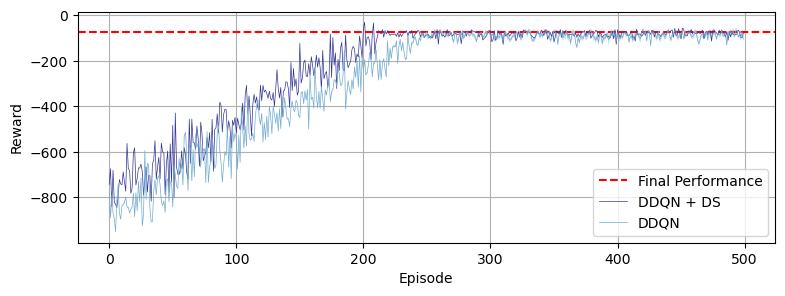

In [193]:

reward_threshold = -75
fig, ax = plt.subplots(figsize=(9,3))
ax.axhline(y=reward_threshold, color='r', linestyle='--', label='Final Performance')
ax.plot(rewards_ddqn_mb.index, rewards_ddqn_mb['mean'], label='DDQN + DS', lw = 0.5, color=COLORS[0])
ax.plot(rewards_ddqn.index, rewards_ddqn['mean'], label='DDQN', lw = 0.5, color=COLORS[1])
ax.fill_between(rewards_ddqn_mb.index,
                rewards_ddqn_mb['mean'] + rewards_ddqn_mb['std'],
                rewards_ddqn_mb['mean'] - rewards_ddqn_mb['std'], 
                alpha=.4, 
                fc=COLORS[0], 
                lw=0)
ax.fill_between(rewards_ddqn.index,
                rewards_ddqn['mean'] + rewards_ddqn['std'],
                rewards_ddqn['mean'] - rewards_ddqn['std'], 
                alpha=.4, 
                fc=COLORS[1], 
                lw=0)
ax.set_xlabel('Episode')
ax.set_ylabel('Reward')
ax.grid()
ax.legend()
plt.savefig('reward.png', dpi=300, bbox_inches='tight')


In [194]:
# some post processing
